In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import json
import uuid
import pathlib

from unityagents import UnityEnvironment
import pandas as pd

from drl_cc import tennis
from drl_cc import scores_util as su
from drl_cc import path_util as pu

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/hm/anaconda3/envs/drlnd/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
tuning_output_dir = pathlib.Path("../training_output/tuning_ddpg")
agent_type = 'DDPG'

In [3]:
default_params = {
    "n_episodes": 3000,
    "update_every": 10,
    "num_updates": 20,
    "buffer_size": 100_000,
    "batch_size": 128,
    "gamma_discount_factor": 0.95,
    "mean_score_threshold": 0.5,
    "max_t": 1000,
    "learning_rate_actor": 3e-3,
    "learning_rate_critic": 1e-3,
    "tau_soft_update": 1e-3,
    "l2_weight_decay": 0,
    "has_ou_noise": True,
    "ou_noise_mu": 0.0,
    "ou_noise_theta": 0.15,
    "ou_noise_sigma_start": 0.3,
    "ou_noise_sigma_end": 0.01,
    "ou_noise_sigma_decay": 0.999,
    "n_random_episodes": 300,
    "agent_seed": 11_111,
    "logging_freq": 1,
}

In [4]:
candidate_params = [
    {
        "update_every": 1,
        "num_updates": 5,
        "ou_noise_sigma_start": 0.4,
        "ou_noise_sigma_end": 0.05,
        "ou_noise_sigma_decay": 0.90,
        "gamma_discount_factor": 0.95,
        "learning_rate_actor": 3e-3,
        "learning_rate_critic": 1e-3,
        "tau_soft_update": 3e-3,
        "buffer_size": 100_000,
        "batch_size": 128,
    },
#     {
#         "update_every": 3,
#         "num_updates": 10,
#         "ou_noise_sigma_start": 0.4,
#         "ou_noise_sigma_end": 0.05,
#         "ou_noise_sigma_decay": 0.90,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#         "tau_soft_update": 3e-3,
#         "buffer_size": 500_000,
#         "batch_size": 512,
#     },
    # not run yet
    {
        "update_every": 2,
        "num_updates": 10,
        "ou_noise_sigma_start": 0.4,
        "ou_noise_sigma_end": 0.05,
        "ou_noise_sigma_decay": 0.90,
        "gamma_discount_factor": 0.95,
        "learning_rate_actor": 3e-3,
        "learning_rate_critic": 1e-3,
        "tau_soft_update": 3e-3,
        "buffer_size": 1_000_000,
        "batch_size": 1024,
    },
#     # solved in 809 with some fluctuation
#     {
#         "update_every": 1,
#         "num_updates": 2,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#         "tau_soft_update": 1e-2,
#         "buffer_size": 1000_000,
#         "batch_size": 1024,
#     },
#     {
#         "update_every": 4,
#         "num_updates": 2,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#     },
#     # worked - reached 2.5+
#     {
#         "update_every": 4,
#         "num_updates": 10,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 3e-3,
#         "learning_rate_critic": 1e-3,
#     },
#     {
#         "update_every": 4,
#         "num_updates": 10,
#         "ou_noise_sigma": 0.1,
#         "gamma_discount_factor": 0.95,
#         "learning_rate_actor": 1e-2,
#         "learning_rate_critic": 3e-3,
#     },
    
]

In [5]:
env = UnityEnvironment(file_name="../Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/95bddecc-442e-47a1-b487-bd12a1a537ce/000


run #1
{'n_episodes': 30, 'update_every': 1, 'num_updates': 5, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 3, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 1	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.075s	Time: 0.075s
Ep: 2	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.183s	Time: 0.258s
Ep: 3	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.060s	Time: 0.320s
Ep: 4	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.268s	Time: 0.589s
Ep: 5	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.604s	Time: 1.193s
Ep: 6	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.873s	Time: 2.067s
Ep: 7	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.963s	Time: 3.031s
Ep: 8	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 1.043s	Time: 4.075s
Ep: 9	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 1.058s	Time: 5.133s
Ep: 10	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.949s	Time: 6.083s
Ep: 11	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.989s	Time: 7.074s
Ep: 12	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.886s	Time: 7.960s
Ep: 13	Sigma(14): 0.092	Score: 0.00	A

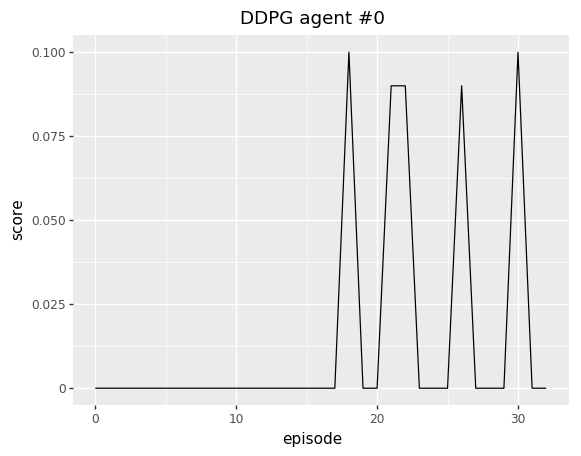

INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/95bddecc-442e-47a1-b487-bd12a1a537ce/001
Ep: 1	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.048s	Time: 0.048s
Ep: 2	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.055s	Time: 0.104s
Ep: 3	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.048s	Time: 0.152s


<ggplot: (-9223363272541824361)>
run #2
{'n_episodes': 30, 'update_every': 1, 'num_updates': 5, 'buffer_size': 100000, 'batch_size': 128, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 3, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 4	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.069s	Time: 0.222s
Ep: 5	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.529s	Time: 0.752s
Ep: 6	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.976s	Time: 1.728s
Ep: 7	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.990s	Time: 2.719s
Ep: 8	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.857s	Time: 3.576s
Ep: 9	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.824s	Time: 4.401s
Ep: 10	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.791s	Time: 5.193s
Ep: 11	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.797s	Time: 5.990s
Ep: 12	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.642s	Time: 6.633s
Ep: 13	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.750s	Time: 7.384s
Ep: 14	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.888s	Time: 8.273s
Ep: 15	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.811s	Time: 9.085s
Ep: 16	Sigma(17): 0.067	Score: 0.0

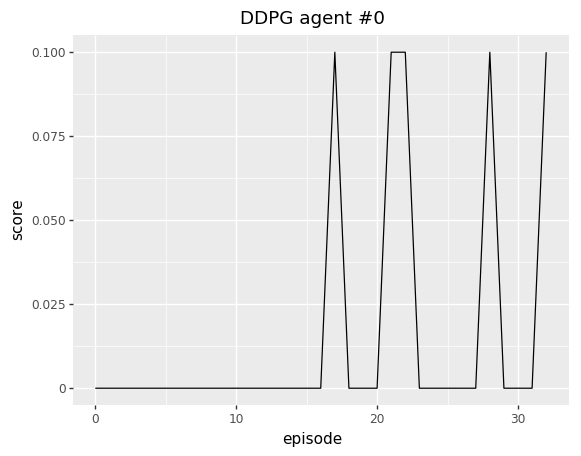

INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/3e510af6-ec96-4098-9b3d-bad962ff7149/000
Ep: 1	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.051s	Time: 0.051s
Ep: 2	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.056s	Time: 0.108s
Ep: 3	Sigma(24): 0.050	Score: 0.10	Avg. Score: 0.03	Time_e: 0.083s	Time: 0.192s


<ggplot: (-9223363272541989211)>
run #1
{'n_episodes': 30, 'update_every': 2, 'num_updates': 10, 'buffer_size': 1000000, 'batch_size': 1024, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 3, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 4	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.03	Time_e: 0.062s	Time: 0.254s
Ep: 5	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.067s	Time: 0.322s
Ep: 6	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.02	Time_e: 0.058s	Time: 0.381s
Ep: 7	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 0.060s	Time: 0.442s
Ep: 8	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.058s	Time: 0.501s
Ep: 9	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.065s	Time: 0.567s
Ep: 10	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.068s	Time: 0.636s
Ep: 11	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.061s	Time: 0.698s
Ep: 12	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.01	Time_e: 0.065s	Time: 0.764s
Ep: 13	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.062s	Time: 0.827s
Ep: 14	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.060s	Time: 0.888s
Ep: 15	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.01	Time_e: 0.055s	Time: 0.944s
Ep: 16	Sigma(14): 0.092	Score: 0.0

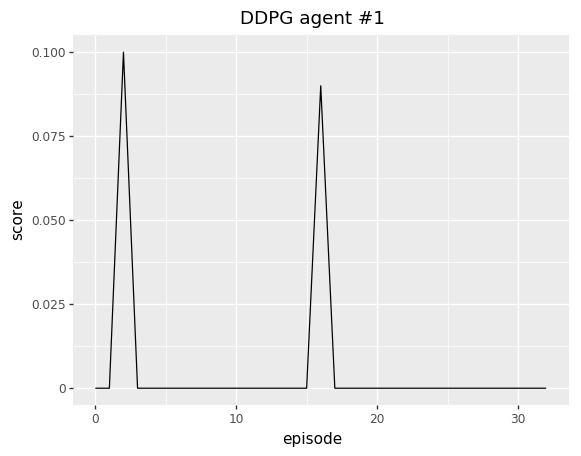

INFO:drl_cc.tennis:Ensuring output directory exists: ../training_output/tuning_ddpg/3e510af6-ec96-4098-9b3d-bad962ff7149/001
Ep: 1	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.049s	Time: 0.049s
Ep: 2	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.047s	Time: 0.097s
Ep: 3	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.051s	Time: 0.148s


<ggplot: (8764304727325)>
run #2
{'n_episodes': 30, 'update_every': 2, 'num_updates': 10, 'buffer_size': 1000000, 'batch_size': 1024, 'gamma_discount_factor': 0.95, 'mean_score_threshold': 0.5, 'max_t': 1000, 'learning_rate_actor': 0.003, 'learning_rate_critic': 0.001, 'tau_soft_update': 0.003, 'l2_weight_decay': 0, 'has_ou_noise': True, 'ou_noise_mu': 0.0, 'ou_noise_theta': 0.15, 'ou_noise_sigma_start': 0.4, 'ou_noise_sigma_end': 0.05, 'ou_noise_sigma_decay': 0.9, 'n_random_episodes': 3, 'agent_seed': 11111, 'logging_freq': 1}


Ep: 4	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.057s	Time: 0.206s
Ep: 5	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.060s	Time: 0.266s
Ep: 6	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.066s	Time: 0.333s
Ep: 7	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.058s	Time: 0.391s
Ep: 8	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.056s	Time: 0.447s
Ep: 9	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.066s	Time: 0.514s
Ep: 10	Sigma(15): 0.082	Score: 0.00	Avg. Score: 0.00	Time_e: 0.072s	Time: 0.587s
Ep: 11	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.058s	Time: 0.646s
Ep: 12	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.062s	Time: 0.709s
Ep: 13	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.064s	Time: 0.773s
Ep: 14	Sigma(17): 0.067	Score: 0.00	Avg. Score: 0.00	Time_e: 0.073s	Time: 0.847s
Ep: 15	Sigma(14): 0.092	Score: 0.00	Avg. Score: 0.00	Time_e: 0.071s	Time: 0.918s
Ep: 16	Sigma(14): 0.092	Score: 0.0

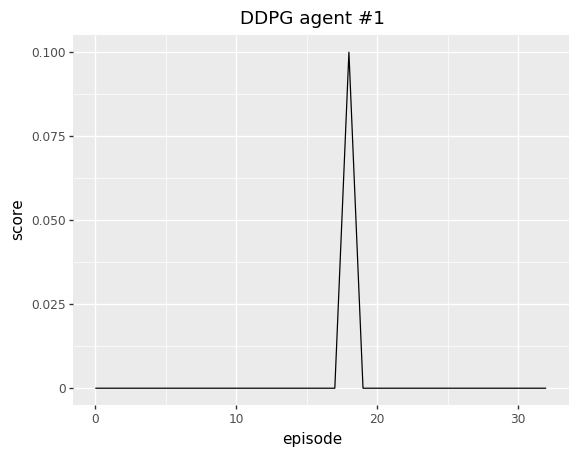

<ggplot: (8764304702563)>


In [6]:
num_runs_per_paramset = 2
for i, p in enumerate(candidate_params, start=0):
    u_name = str(uuid.uuid4())
    for j in range(1, num_runs_per_paramset + 1):
        print(f"run #{j+1}")
        training_params = {**default_params, **p}
        print(training_params)
        out_dir = tuning_output_dir.joinpath(u_name).joinpath(f'{j:03d}')
        out_dir.mkdir(parents=True, exist_ok=True)
        with open(out_dir.joinpath("training_params.json"), "w") as f:
            json.dump(training_params, f, indent=2)

        tennis.training(env, out_dir, **training_params)

        df_scores = su.read_scores(out_dir)
        p_scores = su.plot_scores(df_scores, f"DDPG agent #{i}")
        print(p_scores)

In [9]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.